In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
#import airfoil_treatment
#SELECCIONADOR DE BORDE DE ATAQUE

#ATMO & FLIGHT CONDITIONS
c=3; rho=1.225; U=51;

In [4]:
#nuestro vector de entrada por terminal debería ser el:
#[nombre del archivo a leer, el nombre del output, porcentaje de la cuerda que nos quedamos]
#Pendiente hacerlo interactivo, añadir el switch (en favoritos) para sacar las etiquetas que quiera
#elegir si borde de ataque o de salida
#pendiente testear a ver si también lo saca bien para todas las deformadas
xref=0.15
yref=.05
foil=pd.read_csv("presion_Def14_a18.csv",sep=';')
current_labels=list(foil.columns)
default_labels=["U:0","U:1","U:2","nuTilda","nut","p","yPlus","Points:0","Points:1","Points:2"]
new_labels=['p', 'x', 'y', 'Cp', 'p_muestra']

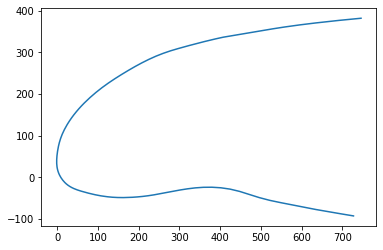

In [5]:
plt.plot(foil.x,foil.y)

In [6]:
foil.head()

,x,y,p
0,746.139223,382.244332,-2569.093664
1,737.901612,381.491073,-2574.905799
2,730.198033,380.779722,-2583.045212
3,722.996738,380.114671,-2591.032588
4,716.267151,379.497992,-2648.960941


In [5]:
def rename_labels(passed_foil,new_labels,current_labels):
    paired_labels=dict(zip(current_labels,new_labels))
    passed_foil.rename(columns=paired_labels,inplace=True)
#rename_labels(foil,new_labels,current_labels)

NameError: name 'foil' is not defined

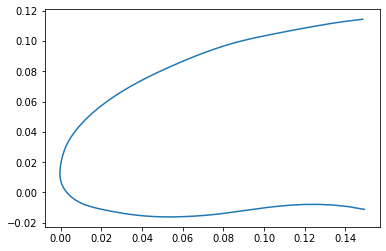

In [3]:
foil=foil[foil.x < xref]
foil.x=foil.x-xref
foil.y=foil.y-yref
foil['zcomplementario']=foil.y-1j*foil.x
foil=foil.iloc[np.angle(foil.zcomplementario).argsort()]
foil.x=foil.x+xref
foil.y=foil.y+yref
plt.plot(foil.x,foil.y)

In [4]:
foil.p = foil.p*2 #transformamos a Cp
foil.p = foil.p*0.5*rho*(U**2)  #transformamos a p-p_inf en Pa
foil.x, foil.y = foil.x*c*1000, foil.y*c*1000
out_labels=['x','y','p']
foil.to_csv("pruebaipy.csv", sep=';', columns=out_labels, index=False)

NameError: name 'pruebaipy' is not defined

In [5]:
foil.to_csv("pruebaipy.csv", sep=';', columns=out_labels, index=False)

In [6]:
pruebaipy=pd.read_csv("pruebaipy.csv", sep=';')

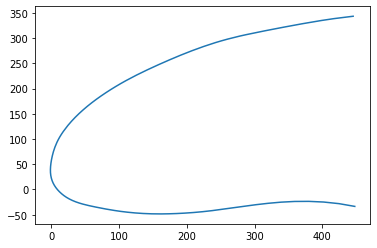

In [7]:
plt.plot(pruebaipy.x,pruebaipy.y)

In [12]:
prueba=pd.read_csv("prueba.csv", sep=';')
prueba.head()

,x,y,p
0,445.373431,343.212839,-3327.454270
1,445.373431,343.212839,-3327.454270
2,435.955853,341.699241,-3440.524449
3,435.955853,341.699241,-3440.524449
4,426.543726,340.152192,-3567.457067


In [10]:
pruebaipy.head()

,x,y,p
0,445.373431,343.212839,-3327.454270
1,445.373431,343.212839,-3327.454270
2,435.955853,341.699241,-3440.524449
3,435.955853,341.699241,-3440.524449
4,426.543726,340.152192,-3567.457067


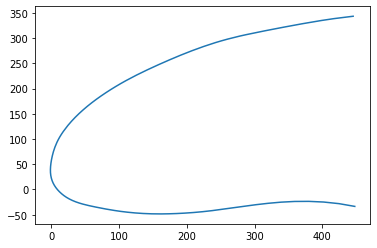

In [13]:
plt.plot(prueba.x,prueba.y)